In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import seaborn as sns  # 시각화 라이브러리

In [2]:
train = pd.read_csv('data/smhrd/train.csv', index_col = 'ID')
test = pd.read_csv('data/smhrd/test.csv', index_col = 'ID')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          516 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   666 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          321 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   360 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   385 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


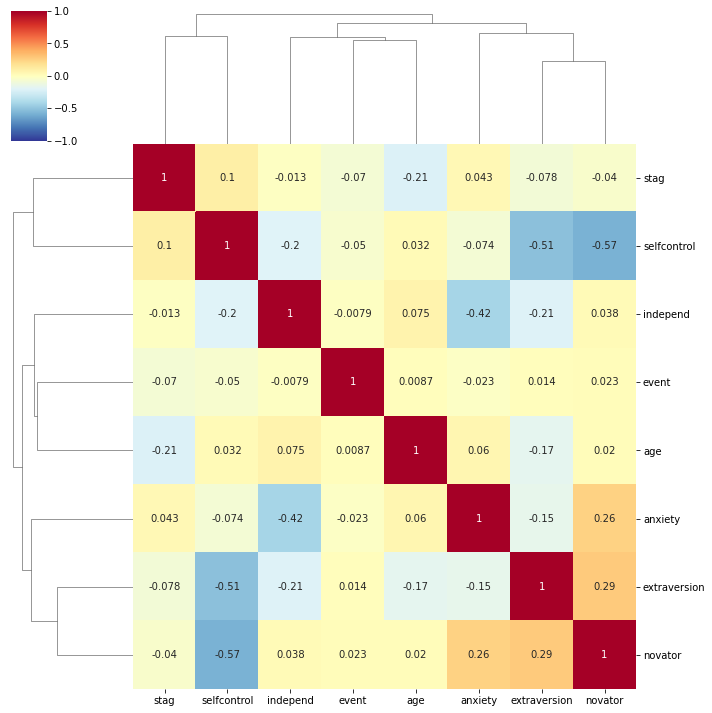

In [5]:
# 상관계수 색 그래프로 나타내기

sns.clustermap(train.corr(), 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [6]:
train.corr()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.070421,-0.214415,-0.078248,-0.013056,0.102294,0.042807,-0.039662
event,-0.070421,1.000000,0.008723,0.013961,-0.007915,-0.049588,-0.022668,0.022554
age,-0.214415,0.008723,1.000000,-0.169429,0.074582,0.032276,0.060051,0.020334
extraversion,-0.078248,0.013961,-0.169429,1.000000,-0.208904,-0.512422,-0.150632,0.287073
independ,-0.013056,-0.007915,0.074582,-0.208904,1.000000,-0.202594,-0.418896,0.038421
selfcontrol,0.102294,-0.049588,0.032276,-0.512422,-0.202594,1.000000,-0.074452,-0.573815
anxiety,0.042807,-0.022668,0.060051,-0.150632,-0.418896,-0.074452,1.000000,0.255866
novator,-0.039662,0.022554,0.020334,0.287073,0.038421,-0.573815,0.255866,1.000000


<AxesSubplot:xlabel='stag', ylabel='count'>

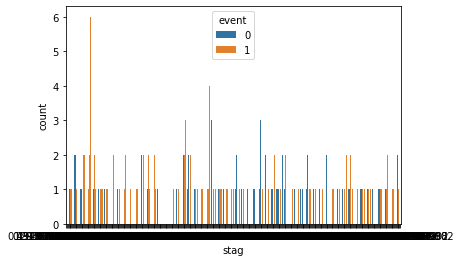

In [7]:
sns.countplot(data=train, x='stag', hue = 'event')

## stag

In [8]:
train_and_test = [train, test]
for dataset in train_and_test:
    dataset['stag'].fillna(dataset['stag'].mean(), inplace=True)
    dataset['stag'] = dataset['stag'].astype(int)
    dataset['stagGroup'] = pd.cut(dataset['stag'], 10)
    
print (train[['stagGroup', 'event']].groupby(['stagGroup'], as_index=False).mean()) # Survivied ratio about Age Group


        stagGroup     event
0  (-0.179, 17.9]  0.654822
1    (17.9, 35.8]  0.621849
2    (35.8, 53.7]  0.686131
3    (53.7, 71.6]  0.648649
4    (71.6, 89.5]  0.555556
5   (89.5, 107.4]  0.444444
6  (107.4, 125.3]  0.555556
7  (125.3, 143.2]  0.875000
8  (143.2, 161.1]  0.600000
9  (161.1, 179.0]  0.200000


- stag에 들어 있는 값을 위에서 구한 구간에 속하도록 바꿔준다.

In [9]:
for dataset in train_and_test:
    dataset.loc[ dataset['stag'] <= 17.9, 'stag'] = 0
    dataset.loc[(dataset['stag'] > 17.9) & (dataset['stag'] <= 35.8), 'stag'] = 1
    dataset.loc[(dataset['stag'] > 35.8) & (dataset['stag'] <= 53.7), 'stag'] = 2
    dataset.loc[(dataset['stag'] > 53.7) & (dataset['stag'] <= 71.6), 'stag'] = 3
    dataset.loc[(dataset['stag'] > 71.6) & (dataset['stag'] <= 89.5), 'stag'] = 4
    dataset.loc[(dataset['stag'] > 89.5) & (dataset['stag'] <= 107.4), 'stag'] = 5
    dataset.loc[(dataset['stag'] > 107.4) & (dataset['stag'] <= 125.3), 'stag'] = 6
    dataset.loc[(dataset['stag'] > 125.3) & (dataset['stag'] <= 143.2), 'stag'] = 7
    dataset.loc[(dataset['stag'] > 143.2) & (dataset['stag'] <= 161.1), 'stag'] = 8
    dataset.loc[(dataset['stag'] > 161.1) & (dataset['stag'] <= 179), 'stag'] = 9
    
    
    dataset['stag'] = dataset['stag'].astype(str)

<AxesSubplot:xlabel='stag', ylabel='count'>

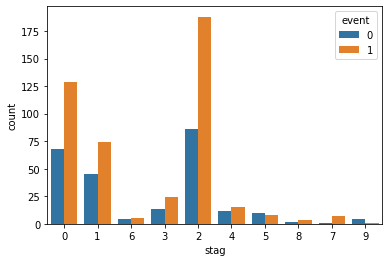

In [10]:
sns.countplot(data=train, x='stag', hue = 'event')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          699 non-null    object  
 1   event         699 non-null    int64   
 2   gender        699 non-null    object  
 3   age           699 non-null    float64 
 4   industry      672 non-null    object  
 5   profession    699 non-null    object  
 6   traffic       699 non-null    object  
 7   coach         699 non-null    object  
 8   head_gender   699 non-null    object  
 9   greywage      679 non-null    object  
 10  way           678 non-null    object  
 11  extraversion  699 non-null    float64 
 12  independ      699 non-null    float64 
 13  selfcontrol   666 non-null    float64 
 14  anxiety       699 non-null    float64 
 15  novator       699 non-null    float64 
 16  stagGroup     699 non-null    category
dtypes: category(1), float64(6), int64(1), object(9)
memory

## stag 채우기

In [12]:
#train.groupby(["gender","age"]).median()["stag"]

In [13]:
#stag 결측치 row drop 시켜 주기 
#train['age'] = train['age'].astype('int64')
#index = train['age'][train['age']== 47].index
#index2 = train['age'][train['age']== 58].index

#train = train.drop(index)
#rain = train.drop(index2)
#test
#test['age'] = test['age'].astype('int64')
#index3 = test['age'][test['age']== 47].index
#index4 = test['age'][test['age']== 58].index
#test = test.drop(index3)
#test = test.drop(index4)

In [14]:
#pt = train.pivot_table(values = "stag", index = ["age"],aggfunc = "mean")

In [15]:
#def fill_stag(df):
#    if np.isnan(df['stag']):
#        return pt.loc[df['age']]
#    else:
#        return df['stag']

In [16]:
#train['stag'] = train.apply(fill_stag,axis = 1).astype('int64')
#test['stag'] = test.apply(fill_stag,axis = 1).astype('int64')
#train['stag'] = train['stag'].fillna(0)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          699 non-null    object  
 1   event         699 non-null    int64   
 2   gender        699 non-null    object  
 3   age           699 non-null    float64 
 4   industry      672 non-null    object  
 5   profession    699 non-null    object  
 6   traffic       699 non-null    object  
 7   coach         699 non-null    object  
 8   head_gender   699 non-null    object  
 9   greywage      679 non-null    object  
 10  way           678 non-null    object  
 11  extraversion  699 non-null    float64 
 12  independ      699 non-null    float64 
 13  selfcontrol   666 non-null    float64 
 14  anxiety       699 non-null    float64 
 15  novator       699 non-null    float64 
 16  stagGroup     699 non-null    category
dtypes: category(1), float64(6), int64(1), object(9)
memory

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          430 non-null    object  
 1   gender        430 non-null    object  
 2   age           430 non-null    float64 
 3   industry      430 non-null    object  
 4   profession    430 non-null    object  
 5   traffic       430 non-null    object  
 6   coach         430 non-null    object  
 7   head_gender   360 non-null    object  
 8   greywage      430 non-null    object  
 9   way           430 non-null    object  
 10  extraversion  430 non-null    float64 
 11  independ      430 non-null    float64 
 12  selfcontrol   385 non-null    float64 
 13  anxiety       430 non-null    float64 
 14  novator       430 non-null    float64 
 15  stagGroup     430 non-null    category
dtypes: category(1), float64(6), object(9)
memory usage: 54.6+ KB


### industry 채우기 

<AxesSubplot:xlabel='industry', ylabel='count'>

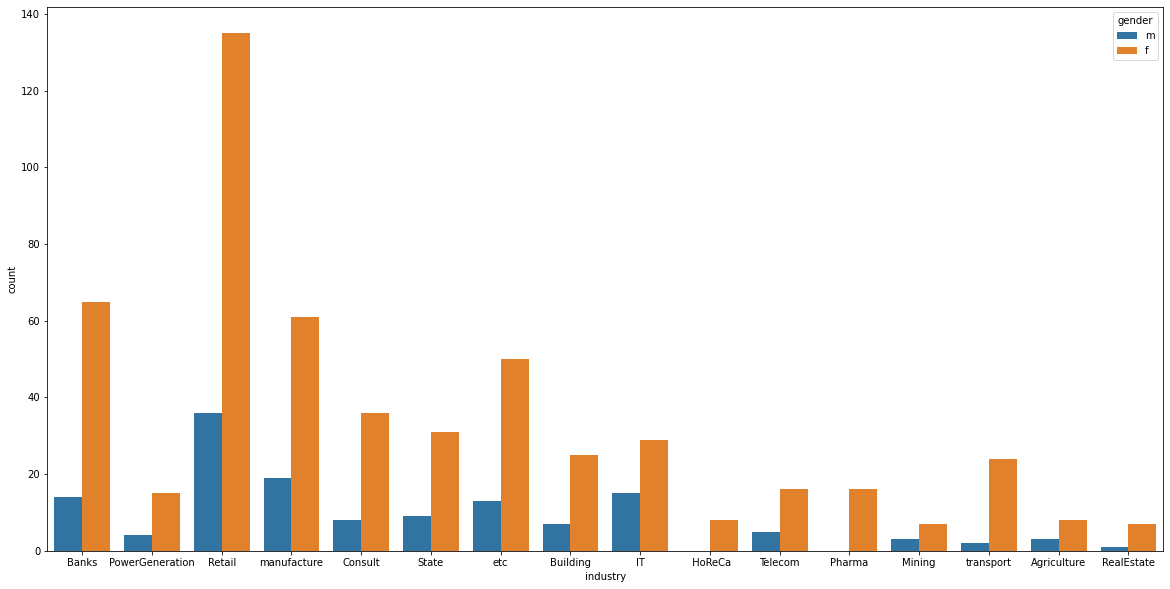

In [19]:
plt.figure(figsize= (20,10))
sns.countplot(data = train, x = 'industry', hue = 'gender')

In [20]:
train['industry'].value_counts()

Retail             171
manufacture         80
Banks               79
etc                 63
IT                  44
Consult             44
State               40
Building            32
transport           26
Telecom             21
PowerGeneration     19
Pharma              16
Agriculture         11
Mining              10
RealEstate           8
 HoReCa              8
Name: industry, dtype: int64

In [21]:
test['industry'].value_counts()

Retail             110
IT                  77
manufacture         62
Banks               31
Consult             30
etc                 27
PowerGeneration     18
Telecom             15
Mining              13
State               12
transport           11
Building             9
Agriculture          4
RealEstate           4
Pharma               4
 HoReCa              3
Name: industry, dtype: int64

In [22]:
#pt2 = train.pivot_table(values = 'industry', index = ['gender'], aggfunc = 'count')

In [23]:
#def fill_industry(df):
#    if np.isnan(df['industry']):
#        return pt2.loc[df['gender']]
#    else:
#        return df['industry']
#test['industry'] = test.apply(fill_industry,axis = 1)

In [24]:
train['industry'] = train['industry'].fillna('Retail')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          699 non-null    object  
 1   event         699 non-null    int64   
 2   gender        699 non-null    object  
 3   age           699 non-null    float64 
 4   industry      699 non-null    object  
 5   profession    699 non-null    object  
 6   traffic       699 non-null    object  
 7   coach         699 non-null    object  
 8   head_gender   699 non-null    object  
 9   greywage      679 non-null    object  
 10  way           678 non-null    object  
 11  extraversion  699 non-null    float64 
 12  independ      699 non-null    float64 
 13  selfcontrol   666 non-null    float64 
 14  anxiety       699 non-null    float64 
 15  novator       699 non-null    float64 
 16  stagGroup     699 non-null    category
dtypes: category(1), float64(6), int64(1), object(9)
memory

## way 채우기

In [25]:
train['way'].value_counts()

bus     415
car     189
foot     74
Name: way, dtype: int64

In [26]:
train['way'] = train['way'].fillna('bus')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          699 non-null    object  
 1   event         699 non-null    int64   
 2   gender        699 non-null    object  
 3   age           699 non-null    float64 
 4   industry      699 non-null    object  
 5   profession    699 non-null    object  
 6   traffic       699 non-null    object  
 7   coach         699 non-null    object  
 8   head_gender   699 non-null    object  
 9   greywage      679 non-null    object  
 10  way           699 non-null    object  
 11  extraversion  699 non-null    float64 
 12  independ      699 non-null    float64 
 13  selfcontrol   666 non-null    float64 
 14  anxiety       699 non-null    float64 
 15  novator       699 non-null    float64 
 16  stagGroup     699 non-null    category
dtypes: category(1), float64(6), int64(1), object(9)
memory

## greywage 채우기

In [27]:
train['greywage'].value_counts()

white    602
grey      77
Name: greywage, dtype: int64

In [28]:
train['greywage'] = train['greywage'].fillna('white')


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          699 non-null    object  
 1   event         699 non-null    int64   
 2   gender        699 non-null    object  
 3   age           699 non-null    float64 
 4   industry      699 non-null    object  
 5   profession    699 non-null    object  
 6   traffic       699 non-null    object  
 7   coach         699 non-null    object  
 8   head_gender   699 non-null    object  
 9   greywage      699 non-null    object  
 10  way           699 non-null    object  
 11  extraversion  699 non-null    float64 
 12  independ      699 non-null    float64 
 13  selfcontrol   666 non-null    float64 
 14  anxiety       699 non-null    float64 
 15  novator       699 non-null    float64 
 16  stagGroup     699 non-null    category
dtypes: category(1), float64(6), int64(1), object(9)
memory

## self control 채우기

In [30]:
#mean = train['selfcontrol'].mean()
#train['selfcontrol'] = train['selfcontrol'].fillna(mean)
#test['selfcontrol'] = test['selfcontrol'].fillna(mean)

In [31]:
train['selfcontrol'].dtype

dtype('float64')

In [32]:
train_and_test = [train, test]
for dataset in train_and_test:
    dataset['selfcontrol'].fillna(dataset['selfcontrol'].mean(), inplace=True)
    dataset['selfcontrol'] = dataset['selfcontrol'].astype(int)
    dataset['selfGroup'] = pd.cut(dataset['selfcontrol'], 3)
print (train[['selfGroup', 'event']].groupby(['selfGroup'], as_index=False).mean())

      selfGroup     event
0  (0.991, 4.0]  0.666667
1    (4.0, 7.0]  0.678201
2   (7.0, 10.0]  0.523364


In [33]:
for dataset in train_and_test:
    dataset.loc[ dataset['selfcontrol'] <= 4, 'selfcontrol'] = 0
    dataset.loc[(dataset['selfcontrol'] > 4) & (dataset['selfcontrol'] <= 7), 'selfcontrol'] = 1
    dataset.loc[(dataset['selfcontrol'] > 7) & (dataset['selfcontrol'] <= 10), 'selfcontrol'] = 2
    
    dataset['selfGroup'] = dataset['selfGroup'].astype(str)

In [34]:
test['selfcontrol'].value_counts()

1    196
0    162
2     72
Name: selfcontrol, dtype: int64

In [35]:
#train_and_test = [train, test]
#for dataset in train_and_test:
#    dataset["status"] = dataset["selfcontrol"] + dataset["novator"]
#    dataset['status'] = dataset['status'].astype(str)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          699 non-null    object  
 1   event         699 non-null    int64   
 2   gender        699 non-null    object  
 3   age           699 non-null    float64 
 4   industry      699 non-null    object  
 5   profession    699 non-null    object  
 6   traffic       699 non-null    object  
 7   coach         699 non-null    object  
 8   head_gender   699 non-null    object  
 9   greywage      699 non-null    object  
 10  way           699 non-null    object  
 11  extraversion  699 non-null    float64 
 12  independ      699 non-null    float64 
 13  selfcontrol   699 non-null    int32   
 14  anxiety       699 non-null    float64 
 15  novator       699 non-null    float64 
 16  stagGroup     699 non-null    category
 17  selfGroup     699 non-null    object  
dtypes: categor

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          430 non-null    object  
 1   gender        430 non-null    object  
 2   age           430 non-null    float64 
 3   industry      430 non-null    object  
 4   profession    430 non-null    object  
 5   traffic       430 non-null    object  
 6   coach         430 non-null    object  
 7   head_gender   360 non-null    object  
 8   greywage      430 non-null    object  
 9   way           430 non-null    object  
 10  extraversion  430 non-null    float64 
 11  independ      430 non-null    float64 
 12  selfcontrol   430 non-null    int32   
 13  anxiety       430 non-null    float64 
 14  novator       430 non-null    float64 
 15  stagGroup     430 non-null    category
 16  selfGroup     430 non-null    object  
dtypes: category(1), float64(5), int32(1), object(10)
me

## test : head_gender 채우기

<AxesSubplot:xlabel='industry', ylabel='count'>

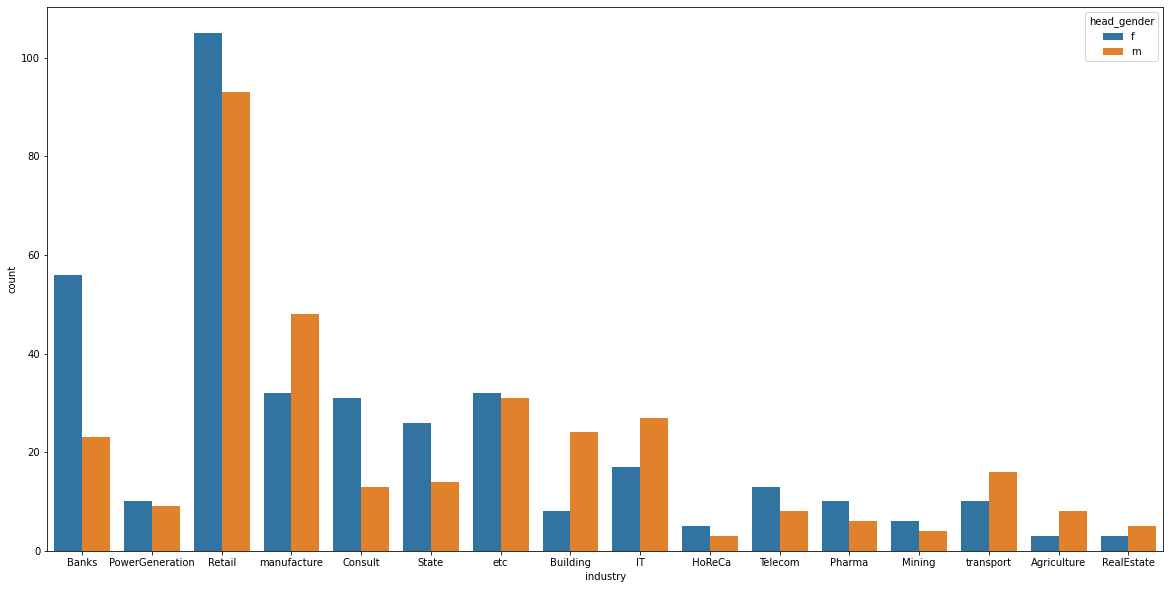

In [38]:
plt.figure(figsize= (20,10))
sns.countplot(data = train, x = 'industry', hue = 'head_gender')

In [39]:
test['head_gender'].value_counts()

m    205
f    155
Name: head_gender, dtype: int64

In [40]:
pt1 = train.pivot_table(values = 'head_gender', index = ['industry'], aggfunc = 'count')
pt1

,head_gender
industry,
HoReCa,8
Agriculture,11
Banks,79
Building,32
Consult,44
IT,44
Mining,10
Pharma,16
PowerGeneration,19


In [41]:
#def fill_head_gender(df):
#    if np.isnan(df['head_gender']):
#        return pt1.loc[df['industry']]
#    else:
#        return df['head_gender']
#test['head_gender'] = test.apply(fill_head_gender,axis = 1)

In [42]:

test['head_gender'] = test['head_gender'].fillna('m')

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          430 non-null    object  
 1   gender        430 non-null    object  
 2   age           430 non-null    float64 
 3   industry      430 non-null    object  
 4   profession    430 non-null    object  
 5   traffic       430 non-null    object  
 6   coach         430 non-null    object  
 7   head_gender   430 non-null    object  
 8   greywage      430 non-null    object  
 9   way           430 non-null    object  
 10  extraversion  430 non-null    float64 
 11  independ      430 non-null    float64 
 12  selfcontrol   430 non-null    int32   
 13  anxiety       430 non-null    float64 
 14  novator       430 non-null    float64 
 15  stagGroup     430 non-null    category
 16  selfGroup     430 non-null    object  
dtypes: category(1), float64(5), int32(1), object(10)
me

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          699 non-null    object  
 1   event         699 non-null    int64   
 2   gender        699 non-null    object  
 3   age           699 non-null    float64 
 4   industry      699 non-null    object  
 5   profession    699 non-null    object  
 6   traffic       699 non-null    object  
 7   coach         699 non-null    object  
 8   head_gender   699 non-null    object  
 9   greywage      699 non-null    object  
 10  way           699 non-null    object  
 11  extraversion  699 non-null    float64 
 12  independ      699 non-null    float64 
 13  selfcontrol   699 non-null    int32   
 14  anxiety       699 non-null    float64 
 15  novator       699 non-null    float64 
 16  stagGroup     699 non-null    category
 17  selfGroup     699 non-null    object  
dtypes: categor

<AxesSubplot:xlabel='gender', ylabel='count'>

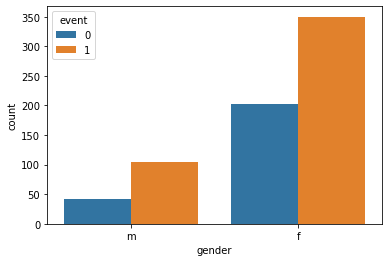

In [45]:
sns.countplot(data = train, x = 'gender', hue = 'event')

<AxesSubplot:xlabel='greywage', ylabel='count'>

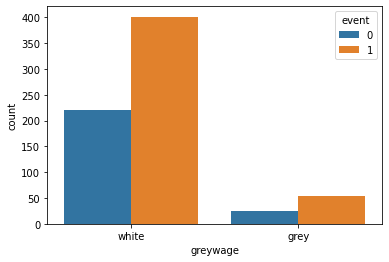

In [46]:
sns.countplot(data = train, x = 'greywage', hue = 'event')

<AxesSubplot:xlabel='stag', ylabel='count'>

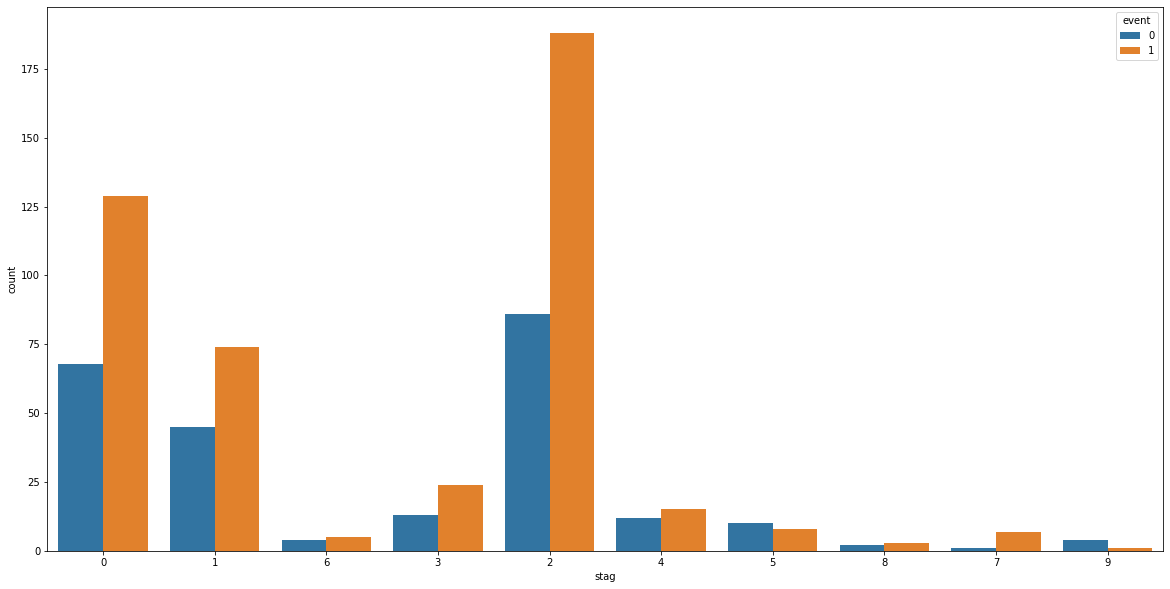

In [47]:
plt.figure(figsize= (20,10))
sns.countplot(data = train, x = 'stag', hue = 'event')

<AxesSubplot:xlabel='industry', ylabel='count'>

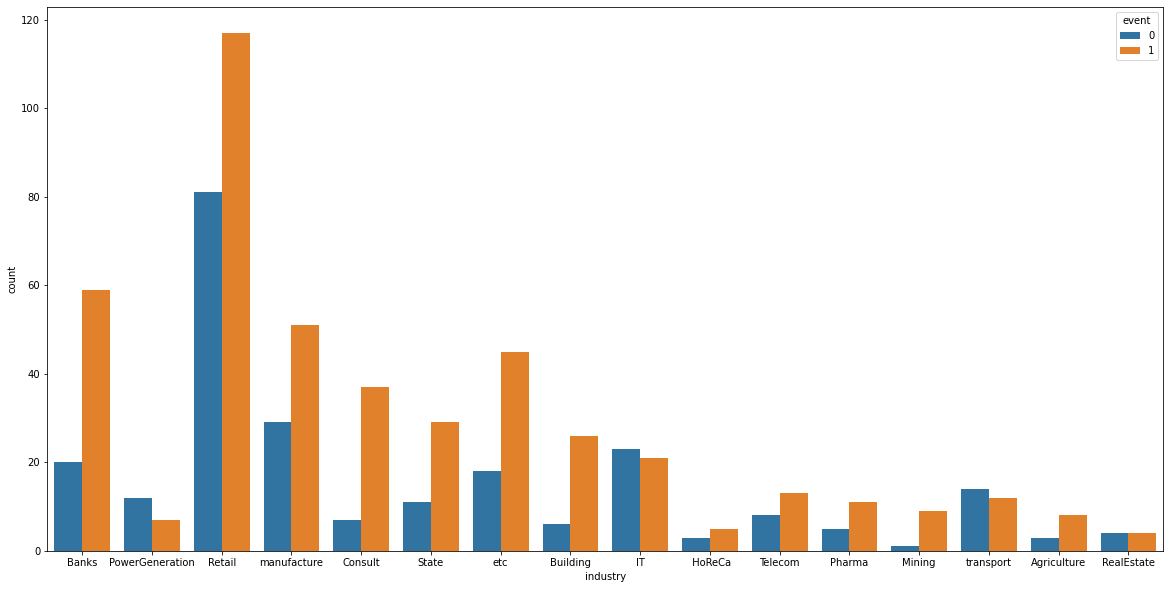

In [48]:
plt.figure(figsize= (20,10))
sns.countplot(data = train, x = 'industry', hue = 'event')

<AxesSubplot:xlabel='traffic', ylabel='count'>

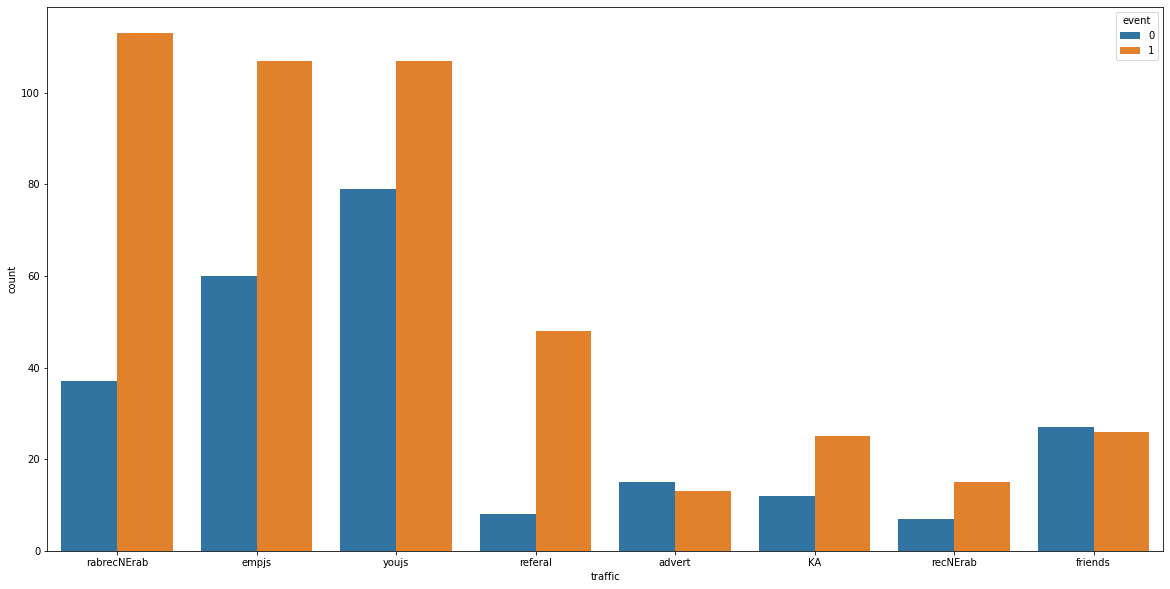

In [49]:
plt.figure(figsize= (20,10))
sns.countplot(data = train, x = 'traffic', hue = 'event')

In [50]:
train['traffic'].unique()

array(['rabrecNErab', 'empjs', 'youjs', 'referal', 'advert', 'KA',
       'recNErab', 'friends'], dtype=object)

<AxesSubplot:xlabel='profession', ylabel='count'>

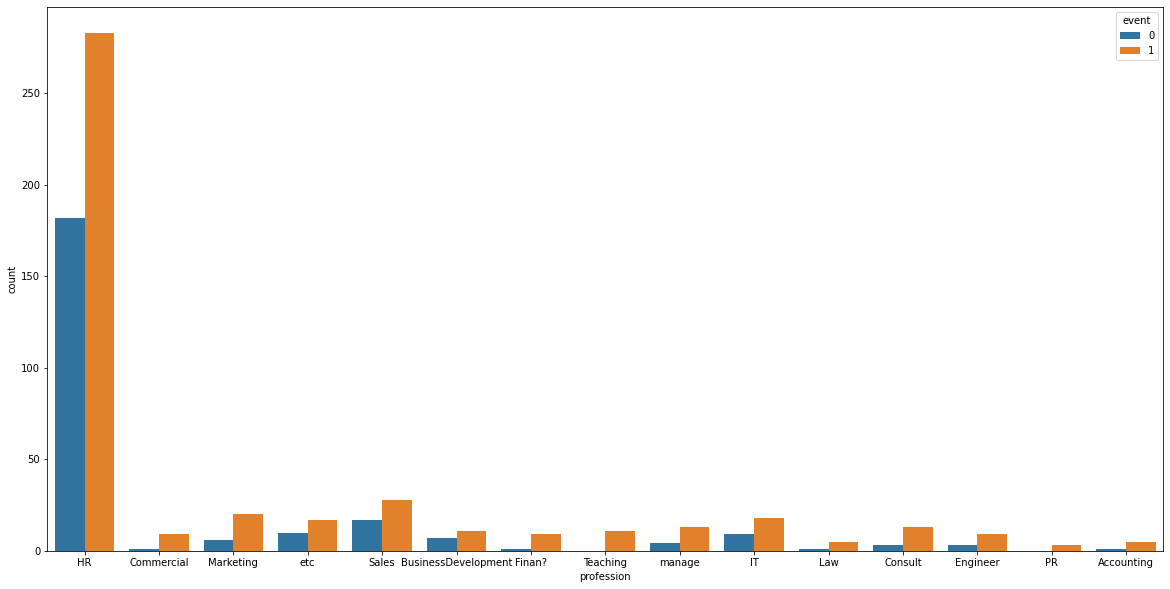

In [51]:
plt.figure(figsize= (20,10))
sns.countplot(data = train, x = 'profession', hue = 'event')

## stag drop

In [52]:
#train.drop('stag', axis = 1 , inplace = True)
#test.drop('stag', axis = 1 , inplace = True)

In [53]:
#train.drop('age', axis = 1 , inplace = True)
#test.drop('age', axis = 1 , inplace = True)
#train.drop('stagGroup', axis = 1 , inplace = True)
#test.drop('stagGroup', axis = 1 , inplace = True)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   stag          430 non-null    object  
 1   gender        430 non-null    object  
 2   age           430 non-null    float64 
 3   industry      430 non-null    object  
 4   profession    430 non-null    object  
 5   traffic       430 non-null    object  
 6   coach         430 non-null    object  
 7   head_gender   430 non-null    object  
 8   greywage      430 non-null    object  
 9   way           430 non-null    object  
 10  extraversion  430 non-null    float64 
 11  independ      430 non-null    float64 
 12  selfcontrol   430 non-null    int32   
 13  anxiety       430 non-null    float64 
 14  novator       430 non-null    float64 
 15  stagGroup     430 non-null    category
 16  selfGroup     430 non-null    object  
dtypes: category(1), float64(5), int32(1), object(10)
me

In [55]:
#profession mapping
#profession = ['HR', 'Commercial', 'Marketing', 'etc', 'Sales',
#       'BusinessDevelopment', 'Finan?', 'Teaching', 'manage', 'IT', 'Law',
#       'Consult', 'Engineer', 'PR', 'Accounting']
#c_profession = ['HR', 'IT'] + ['Other'] * 13
#title_dic = dict(zip(profession,c_profession))
#title_dic
#train['profession'] = train['profession'].map(title_dic)
#train['profession'].unique()
#test['profession'] = test['profession'].map(title_dic)
#test['profession'].unique()

In [56]:
train['industry'].unique()

array(['Banks', 'PowerGeneration', 'Retail', 'manufacture', 'Consult',
       'State', 'etc', 'Building', 'IT', ' HoReCa', 'Telecom', 'Pharma',
       'Mining', 'transport', 'Agriculture', 'RealEstate'], dtype=object)

In [57]:
cat_feature = ['gender','stag','selfGroup','stagGroup','profession','industry','traffic','coach','head_gender','greywage','way']

In [58]:
y_train = train['event']
X_train = train.drop('event', axis = 1)
X_test = test

In [59]:
X_train.shape

(699, 17)

In [60]:
y_train.shape

(699,)

In [61]:
X_test.shape

(430, 17)

In [62]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix = i)
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(i, axis=1, inplace = True)

In [63]:
for i in cat_feature:
    dummy = pd.get_dummies(test[i], prefix = i)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(i, axis=1, inplace = True)

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 80 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             699 non-null    float64
 1   extraversion                    699 non-null    float64
 2   independ                        699 non-null    float64
 3   selfcontrol                     699 non-null    int32  
 4   anxiety                         699 non-null    float64
 5   novator                         699 non-null    float64
 6   gender_f                        699 non-null    uint8  
 7   gender_m                        699 non-null    uint8  
 8   stag_0                          699 non-null    uint8  
 9   stag_1                          699 non-null    uint8  
 10  stag_2                          699 non-null    uint8  
 11  stag_3                          699 non-null    uint8  
 12  stag_4                          699 

In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 80 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             430 non-null    float64
 1   extraversion                    430 non-null    float64
 2   independ                        430 non-null    float64
 3   selfcontrol                     430 non-null    int32  
 4   anxiety                         430 non-null    float64
 5   novator                         430 non-null    float64
 6   gender_f                        430 non-null    uint8  
 7   gender_m                        430 non-null    uint8  
 8   stag_0                          430 non-null    uint8  
 9   stag_1                          430 non-null    uint8  
 10  stag_2                          430 non-null    uint8  
 11  stag_3                          430 non-null    uint8  
 12  stag_4                          4

In [66]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [67]:
set(X_train.columns) - set(X_test.columns)

{'stagGroup_(-0.179, 17.9]',
 'stagGroup_(107.4, 125.3]',
 'stagGroup_(125.3, 143.2]',
 'stagGroup_(143.2, 161.1]',
 'stagGroup_(161.1, 179.0]',
 'stagGroup_(17.9, 35.8]',
 'stagGroup_(35.8, 53.7]',
 'stagGroup_(53.7, 71.6]',
 'stagGroup_(71.6, 89.5]',
 'stagGroup_(89.5, 107.4]'}

## 결정트리

In [68]:
from sklearn.model_selection import cross_val_score
tree_model = DecisionTreeClassifier(max_depth = 5)
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 10)
result
print(result.mean())

0.6395445134575569


### 학습

In [69]:
#sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [70]:
#학습시키기 전에는 주어진 데이터가 정렬되어있어 학습에 방해가 될 수도 있으므로 섞어주
X_train, y_train = shuffle(X_train, y_train, random_state = 5)

In [71]:
result = pd.read_csv('data/smhrd/submission.csv')
tree_model.fit(X_train, y_train)
pre = tree_model.predict(X_test)
result['event'] = pre
result.to_csv('submission4.csv', index = False)

In [72]:
pre

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [73]:
def train_and_test(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = round(model.score(X_train, y_train) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction
    return np.mean(prediction)

In [74]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators= 50))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  70.24 %


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  64.95 %
Accuracy :  79.83 %
Accuracy :  100.0 %
Accuracy :  47.78 %


In [75]:
result = pd.read_csv('data/smhrd/submission.csv')
result['event'] = rf_pred

result.to_csv('submission2.csv', index = False)

In [76]:
rf_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,